In [1]:
#import necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint
import re
import matplotlib.ticker as mtick
pd.set_option('display.max_columns', None)

In [2]:
def find_columns(search_term, dataframe):
    """Finds names of columns with matching search term."""
    cols = [column for column in dataframe.columns if re.search(search_term, column)]
    return cols

In [3]:
#loading the data and renaming columns to match Dr. Sommer's labels
df = pd.read_excel("./Data/collegeEnrollement18To24.xls", header=[0, 1, 2], skiprows=2)
df.columns = ['_'.join(y for y in x if not 'Unnamed' in y) for x in df.columns.tolist()]
df.drop(df.index[[0]], inplace=True)
df = df.dropna(thresh=10)
df.index = df.Year
df = df.drop(columns={'Year'})
df.index = [int(i[:4]) for i in df.index]
df = df.round(2)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(columns=find_columns("1", df))
df.columns = [i.replace("Race/ethnicity", "") \
              .replace("_", "") \
              .replace("by sex", "") \
              .replace(",", "") \
              .strip() for i in df.columns]

df = df.rename(columns={"WhiteFemale": "White Women", 
                   "BlackFemale": "Black Women",
                   "HispanicFemale": "Hispanic Women",
                   "WhiteMale": "White Men",
                   "BlackMale": "Black Men",
                   "HispanicMale": "Hispanic Men", 
                   "SexMale": "Men", 
                   "SexFemale": "Women"})

In [4]:
#looking at the first five rows of the data
df.head()

,Total all students,Level of institution2-year college,Level of institution4-year college or university,Men,Women,White,Black,Hispanic,Pacific Islander,American Indian/ Alaska Native,Two or more races,White Men,White Women,Black Men,Black Women,Hispanic Men,Hispanic Women
1970,25.74,---,---,32.07,20.33,27.06,15.45,---,---,---,---,---,---,---,---,---,---
1971,26.24,---,---,32.46,20.75,27.24,18.21,---,---,---,---,---,---,---,---,---,---
1972,25.46,---,---,30.17,21.17,27.21,18.26,13.3813,---,---,---,32.2703,22.5199,21.0739,15.8609,15.0639,11.976
1973,23.99,6.8994,17.0936,27.75,20.53,25.53,15.90,16.0575,---,---,---,29.5609,21.7683,18.6601,13.5413,16.6912,15.4573
1974,24.60,7.59034,17.0131,27.70,21.75,25.78,17.64,18.0201,---,---,---,28.9002,22.8525,19.7711,15.8876,19.7136,16.4689


In [5]:
#using the find_columns function to find the columns corresponding to the races
white = find_columns("White", df)
black = find_columns("Black", df)
hispanic = find_columns("Hispanic", df)

In [6]:
#slicing the data to create Dr. Sommer's plot
christina_df = df.iloc[2:][["White Women", "Black Women", "Hispanic Women", 
                               "White Men", "Black Men", "Hispanic Men"]].copy()

#changing the datatype of the dataframe
christina_df = christina_df.astype("float64")

#changing the significant digits of the dataframe for aesthetics
christina_df = christina_df.round(1)

#viewing the top five rows of the dataframe
christina_df.head()

,White Women,Black Women,Hispanic Women,White Men,Black Men,Hispanic Men
1972,22.5,15.9,12.0,32.3,21.1,15.1
1973,21.8,13.5,15.5,29.6,18.7,16.7
1974,22.9,15.9,16.5,28.9,19.8,19.7
1975,24.3,20.8,19.5,30.7,19.9,21.4
1976,26.1,22.9,18.8,29.3,22.0,21.3


In [7]:
def plot_data(dataframe, yaxis_lowerlimit, yaxis_upperlimit, yticks= None, kind="bar"):
    """Plot the data from the dataframe using the lower and upper yaxis boundaries."""
    
    if kind=="bar":
        ax = dataframe.plot.bar(rot=0, figsize=(14, 6), color=u'#1f77b4')
    else:
        ax = dataframe.plot(figsize=(10, 6), lw=2)
        plt.xlim(1972, 2018)
    
    plt.title("Percentage of 18 to 24-year-olds enrolled in college (2018)", fontsize=18)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.ylim(yaxis_lowerlimit, yaxis_upperlimit)
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 1.9, p.get_height()) \
                    , ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(ticks=yticks, fontsize=14)    
    return plt.show()

In [8]:
#Dr sommers is looking at 2018 data which can be found below
display(christina_df.tail(1))

#for plotting purposes
christina_df.iloc[46]

,White Women,Black Women,Hispanic Women,White Men,Black Men,Hispanic Men
2018,45.4,40.9,40.4,39.1,33.3,31.6


White Women       45.4
Black Women       40.9
Hispanic Women    40.4
White Men         39.1
Black Men         33.3
Hispanic Men      31.6
Name: 2018, dtype: float64

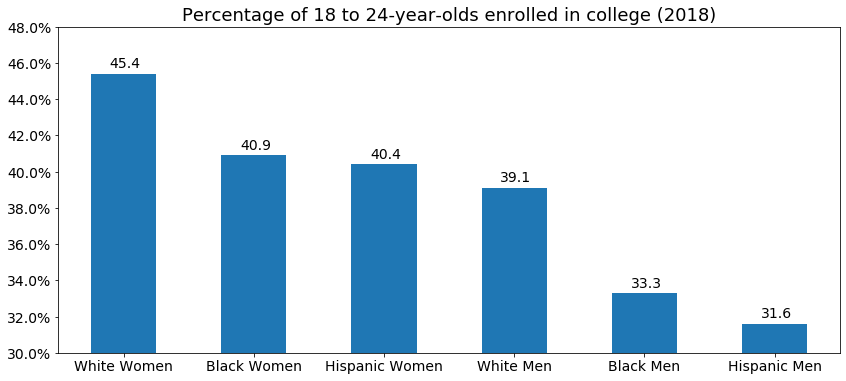

In [9]:
#recreating Dr. Sommers plot with shifted baseline
yticks = [30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
plot_data(dataframe=christina_df.iloc[46], yaxis_lowerlimit=30, yaxis_upperlimit=48, yticks=yticks,  kind="bar")

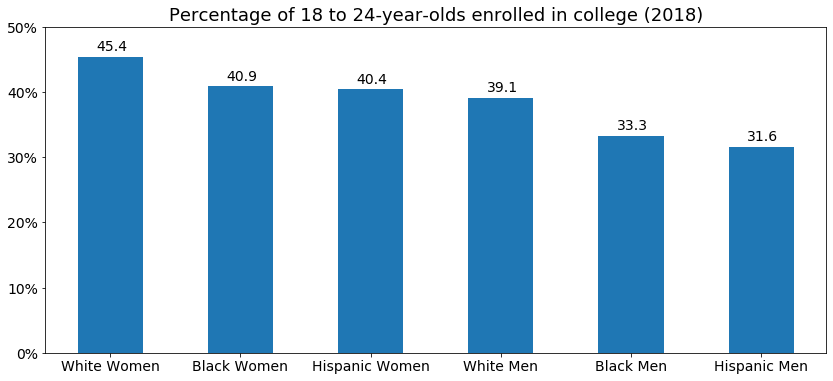

In [10]:
#recreating the plot without manipulating the baseline for exaggeruation
yticks =[0, 10,  20, 30,  40, 50]
plot_data(dataframe=christina_df.iloc[46], yaxis_lowerlimit=0, yaxis_upperlimit=48, yticks=yticks, kind="bar")

### College Enrollement Discrepancies Among the Races

In [11]:
# data belonging to the three races
races = df[["White", "Black", "Hispanic"]].iloc[2:].copy()
races = races.astype('float64')
races = races.round(1)
races.head()

,White,Black,Hispanic
1972,27.2,18.3,13.4
1973,25.5,15.9,16.1
1974,25.8,17.6,18.0
1975,27.4,20.4,20.4
1976,27.6,22.5,20.0


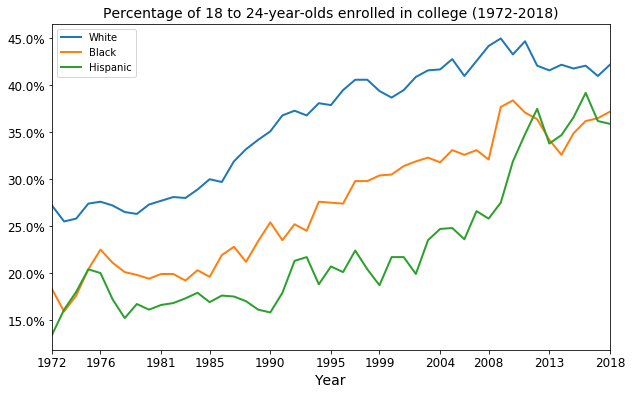

In [12]:
ax = races.plot(figsize=(10, 6), lw=2)
plt.title("Percentage of 18 to 24-year-olds enrolled in college (1972-2018)", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Year", fontsize=14)
plt.xlim(1972, 2018)
myticks = np.linspace(1972, 2018, num=11, dtype='int32')
plt.xticks(myticks, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### College Enrollement Differences Among the Sexes 

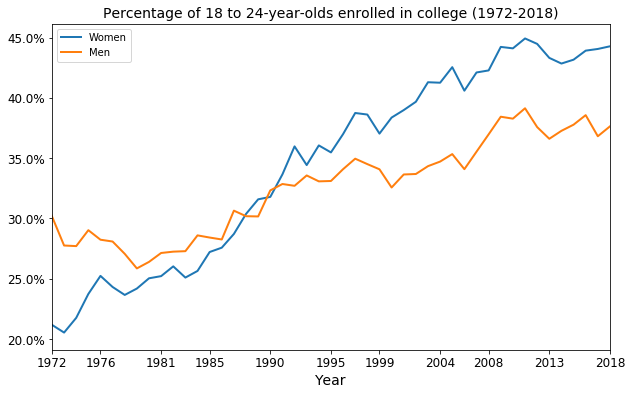

In [13]:
ax = df[["Women", "Men"]].plot(figsize=(10, 6), lw=2)
plt.title("Percentage of 18 to 24-year-olds enrolled in college (1972-2018)", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Year", fontsize=14)
plt.xlim(1972, 2018)
myticks = np.linspace(1972, 2018, num=11, dtype='int32')
plt.xticks(myticks, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
men = find_columns("Men", df)
df_men = df[men].iloc[2:, 1:].copy()
df_men.head()

,White Men,Black Men,Hispanic Men
1972,32.2703,21.0739,15.0639
1973,29.5609,18.6601,16.6912
1974,28.9002,19.7711,19.7136
1975,30.6838,19.8709,21.4495
1976,29.2955,21.9663,21.3425


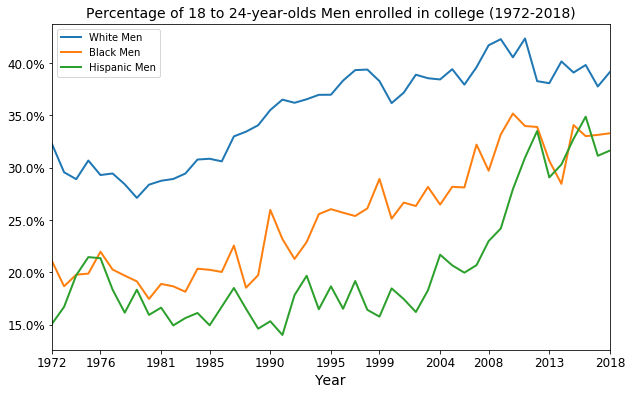

In [15]:
ax = df_men.plot(figsize=(10, 6), lw=2)
plt.title("Percentage of 18 to 24-year-olds Men enrolled in college (1972-2018)", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Year", fontsize=14)
plt.xlim(1972, 2018)
myticks = np.linspace(1972, 2018, num=11, dtype='int32')
plt.xticks(myticks, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
women = find_columns("Women", df)
df_women = df[women].iloc[2:, 1:].copy()
df_women.head()

,White Women,Black Women,Hispanic Women
1972,22.5199,15.8609,11.976
1973,21.7683,13.5413,15.4573
1974,22.8525,15.8876,16.4689
1975,24.344,20.7804,19.453
1976,26.0568,22.9435,18.8423


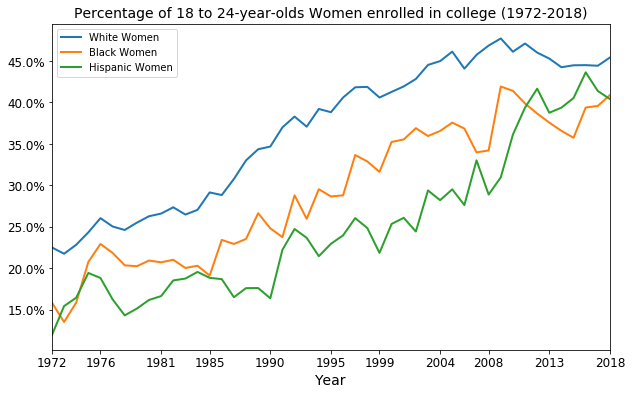

In [17]:
ax = df_women.plot(figsize=(10, 6), lw=2)
plt.title("Percentage of 18 to 24-year-olds Women enrolled in college (1972-2018)", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Year", fontsize=14)
plt.xlim(1972, 2018)
myticks = np.linspace(1972, 2018, num=11, dtype='int32')
plt.xticks(myticks, fontsize=12)
plt.yticks(fontsize=12)
plt.show()